# Simple Linear Regression: Minimal Example

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D

### Generate random input data to train on

In [2]:
observations = 10000

**`np.random.uniform(low, high, size)`** draws a random number from the given interval (low, high), where each number has equal probability of getting selected. Here, size is the shape in which we desire to receive the numbers.

In [3]:
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

In [4]:
inputs = np.column_stack((xs, zs))
inputs.shape

(10000, 2)

### Creating the targets we will aim at

In [5]:
noise = np.random.uniform(-1, 1, (observations, 1))

In [6]:
targets = 13*xs + 7*zs - 12 + noise

In [7]:
targets.shape

(10000, 1)

### Plotting the training data

In [8]:
targets = targets.reshape(observations, 1)

### Initialize variables

In [9]:
init_range = 0.1

In [10]:
weights = np.random.uniform(-init_range, init_range, size=(2,1))
weights

array([[ 0.03666532],
       [-0.06347923]])

In [11]:
biases = np.random.uniform(-init_range, init_range, size=1)
biases

array([0.03660385])

### Setting the learning rate

In [12]:
learning_rate = 0.02

### Training the model

In [13]:
for i in range(200):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations # L2-norm with additional divisions
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    # "inputs.T" transposes the input matrix, allowing the dimenstionalities of the 2 matrices to match,
    # so that dot product can be performed oon them
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)  # Weights updation
    biases = biases - learning_rate * np.sum(deltas_scaled)              # Biases updation

3749.5634228087974
456.10563378049636
107.64879909405866
68.68064915332825
62.32070732897619
59.47640244341462
57.08763973288924
54.82949514174401
52.66455220113626
50.58573238074666
48.589269457397556
46.67186493324708
44.83038439918739
43.06182107742728
41.36328761935586
39.732011045651085
38.16532818282532
36.660681311586345
35.21561399077967
33.827767047034996
32.49487472324592
31.214760979563067
29.98533594085676
28.804592484849877
27.670602965350497
26.581516065234766
25.53555377404245
24.53100848525049
23.56624020848611
22.63967389212794
21.749796851924245
20.89515630143005
20.074356980231904
19.28605887608767
18.52897503726302
17.80186947149268
17.103555128136747
16.432891960237644
15.788785063313707
15.170182887851162
14.576075522576064
14.005493045703613
13.457503941473009
12.931213579382907
12.425762753644662
11.940326280468797
11.474111650894788
11.026357736964865
10.59633354912943
10.183337042855532
9.786693972490083
9.4057567905068
9.039903590339536
8.688537091076405
8.35

### Print weights and biases to see if they worked correctly 

In [14]:
weights

array([[12.99955169],
       [ 6.99838731]])

In [15]:
biases

array([-11.78333069])

### Plot outputs vs targets 

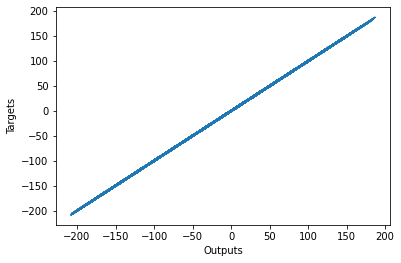

In [16]:
plt.plot(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()